## Configuraciones iniciales

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética para los gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Exploración inicial

In [17]:
df = pd.read_csv('data/medical_students_dataset.csv')

# Vista preliminar
print(f"Dimensiones iniciales: {df.shape}")
df.head(n=21)

Dimensiones iniciales: (200000, 13)


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
5,6.0,32.0,NaN,151.491294,68.647805,B,29.912403,99.668373,70.0,128.0,183.0,NaN,Yes
6,7.0,21.0,NaN,172.949704,48.102744,AB,16.081635,97.715469,66.0,134.0,247.0,No,No
7,8.0,28.0,Male,186.489402,52.389752,AB,15.063921,98.227788,85.0,123.0,128.0,No,No
8,9.0,21.0,Male,155.039678,42.958703,B,NaN,98.808053,NaN,111.0,243.0,No,No
9,10.0,32.0,NaN,170.836315,50.783250,B,17.400435,98.570168,61.0,94.0,166.0,NaN,No


Para este conjunto de datos podemos ver que $X \in \mathbb{R}^{200000 \times 13}$ sin preprocesar. Haremos un analisis sobre las filas y las columnas para descartar datos atipicos y/o caracteristicas redundates, logrando asi una consistencia de los datos claras para su analisis.

$$$$

Al darle un primer vistazo a la muestra de datos, saltan a la vista varios problemas estructurales que no podemos ignorar. Lo más preocupante de entrada es encontrar celdas vacías en la columna Student ID; esto rompe la consistencia de la tabla porque cada registro debería estar identificado de forma única, y un estudiante 'anónimo' no nos sirve para el análisis. Además, se nota un patrón generalizado de datos faltantes o valores `NaN` dispersos en casi todas las columnas, no son solo un par de errores aislados.
$$$$

Por otro lado, hay inconsistencias claras en los formatos de las variables. Por ejemplo, tanto el `Student ID` como la `Age`  aparecen con decimales, cuando por lógica deberían ser números enteros. Este error de formato se extiende a las columnas` Heart Rate`, `Blood Pressure` y `Cholesterol` están almacenadas como flotantes, lo cual es semánticamente incorrecto. La frecuencia cardíaca es un evento discreto  y tanto la presión como el colesterol se reportan estándarmente como enteros. También ocurre que las columnas categóricas como `Diabetes` o `Smoking`, que actualmente se manejan como cadenas de texto, pero que funcionalmente serían mucho más eficientes si se trataran como valores booleanos. Antes de empezar a limpiar o descartar filas, es necesario cuantificar estos errores para tomar las decisiones correctas.

# Observando valores faltantes

/tmp/ipython-input-2896019147.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=null_counts.index, y=null_counts.values, palette='viridis')


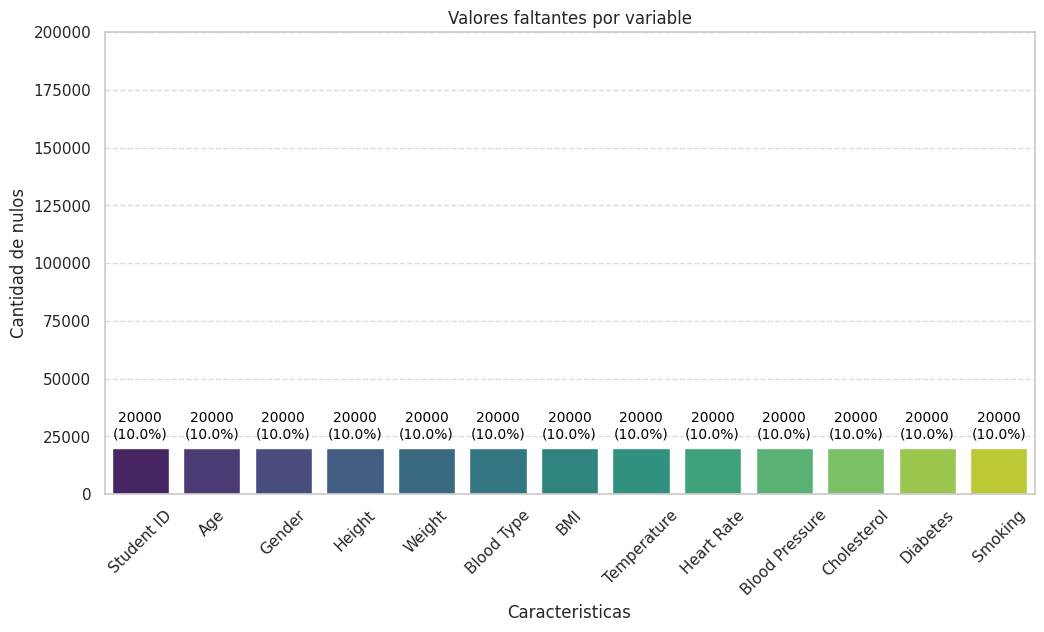

In [18]:
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]  # Solo las que tienen nulos
total_filas = len(df)

# Gráfico ajustado
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=null_counts.index, y=null_counts.values, palette='viridis')


plt.ylim(0, total_filas)

# Agregar etiquetas con cantidad y porcentaje
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_filas) * 100
    ax.annotate(f'{int(height)}\n({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title(f'Valores faltantes por variable')
plt.ylabel('Cantidad de nulos')
plt.xlabel('Caracteristicas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Como podemos ver en el diagrama de barras hay un $10\%$ de data nula por cada caracteristica del conjuto de datos dados. Notemos que intuitivamente el caso mas grave aqui es la columna `Student ID` lo cual no tiene sentido estructural porque significa que estas tratando de decribir un que no sabes quien es, por lo que no tiene sentido mantener esos registros.

## Filtrando estudiantes anonimos

In [19]:
# Creamos una copia para no modificar el original directamente al principio
df_struct = df.copy()

df_struct = df_struct.dropna(subset=['Student ID'])
print("Columna 'Student ID' convertida a Entero.")

print(f"Dimensiones finales: {df_struct.shape}")


Columna 'Student ID' convertida a Entero.
Dimensiones finales: (180000, 13)


Al filtrar las filas que no tenían identificador, descartamos aquellas observaciones anónimas que, en esencia, eran ruido. Si no sabemos a quién pertenecen esos datos, la información pierde su fiabilidad y podría tratarse simplemente de datos inventados.

## Documentando valores faltantes

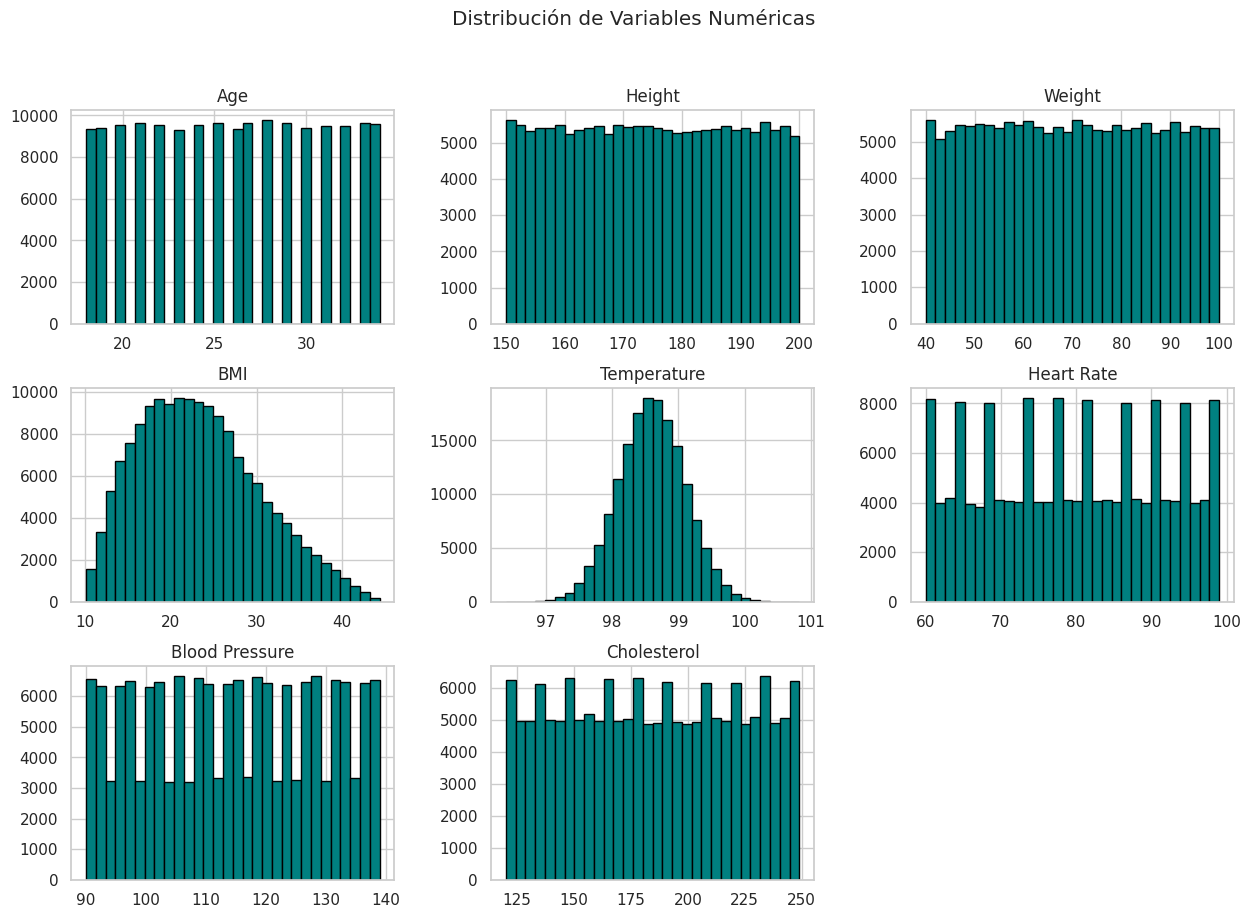

In [20]:
# Solo mostramos columnas numericas, no las categoricas
cols = ['Age','Height',	'Weight',	'BMI',	'Temperature',	'Heart Rate',	'Blood Pressure',	'Cholesterol']
df_struct[cols].hist(bins=30, figsize=(15, 10), color='teal', edgecolor='black')
plt.suptitle('Distribución de Variables Numéricas')
plt.show()

Al revisar los histogramas, podemos confirmar que los datos se comportan de manera natural y uniformes. Esto nos permite hacer un analisis de como rellenar esos valores vacios si aletrar el comportamiento.

In [21]:
df_functional = df_struct.copy()


def imputar_aleatorio(df, col):
    """Rellena nulos tomando valores al azar de la misma columna.
    Mantiene la distribución original (normal, uniforme, etc.) sin crear picos."""
    num_missing = df[col].isnull().sum()
    if num_missing > 0:
        # Tomamos una muestra aleatoria de los valores que SÍ existen
        random_sample = df[col].dropna().sample(num_missing, replace=True, random_state=30326271)
        # Alineamos los índices para que caigan exactamente en los huecos
        random_sample.index = df[df[col].isnull()].index
        # Rellenamos
        df.loc[df[col].isnull(), col] = random_sample
    return df


cols_numericas = ['Age', 'Height', 'Weight', 'Temperature', 'Heart Rate',
                  'Blood Pressure', 'Cholesterol']

for col in cols_numericas:
    # Usamos aleatoria en lugar de mediana para evitar el "pico" en el histograma
    df_functional = imputar_aleatorio(df_functional, col)


# Usamos la misma lógica para no distorsionar las clases
cols_categoricas = ['Diabetes', 'Smoking', 'Gender', 'Blood Type']

for col in cols_categoricas:
    df_functional = imputar_aleatorio(df_functional, col)


# Se calcula al final usando los nuevos valores completos de Peso y Altura
bmi_recalculado = df_functional['Weight'] / ((df_functional['Height'] / 100) ** 2)

# Reemplazamos la columna para asegurar precisión
df_functional['BMI'] = bmi_recalculado

# Verificación final
print("Dimensiones:", df_functional.shape)
print("Total de Nulos restantes:", df_functional.isnull().sum().sum())
df_functional.head(n=21)

Dimensiones: (180000, 13)
Total de Nulos restantes: 0


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,98.576584,95.0,109.0,203.0,No,Yes
1,2.0,23.0,Male,152.069157,47.630941,B,20.597139,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
4,5.0,23.0,Female,197.692721,46.234173,O,11.829918,98.480008,95.0,106.0,231.0,No,No
5,6.0,32.0,Male,151.491294,68.647805,B,29.912403,99.668373,70.0,128.0,183.0,No,Yes
6,7.0,21.0,Female,172.949704,48.102744,AB,16.081635,97.715469,66.0,134.0,247.0,No,No
7,8.0,28.0,Male,186.489402,52.389752,AB,15.063921,98.227788,85.0,123.0,128.0,No,No
8,9.0,21.0,Male,155.039678,42.958703,B,17.871682,98.808053,94.0,111.0,243.0,No,No
9,10.0,32.0,Male,170.836315,50.783250,B,17.400435,98.570168,61.0,94.0,166.0,No,No
10,11.0,28.0,Female,152.973928,73.572814,B,31.440000,98.371843,60.0,133.0,241.0,No,Yes


Para solucionar el problema de que faltaban datos en el 10% de la muestra, se eligió usar una técnica llamada Imputación por Muestreo Aleatorio. Esta técnica se aplicó tanto a los datos numéricos como a los categóricos.
En el caso de los datos numéricos, no se usó la mediana para rellenar los valores que faltaban porque eso podría crear un pico artificial en los gráficos y cambiar la forma natural de los datos. Como faltaba un 10%, poner un solo valor central habría distorsionado mucho los resultados. En cambio, al tomar valores al azar respetando la distribución original, se mantiene la variabilidad real y el modelo puede aprender mejor.
Para las variables categóricas y binarias, como género o tipo de sangre, tampoco se usó la moda ni un valor fijo porque eso haría que la categoría más común apareciera demasiado. En su lugar, se eligieron valores al azar respetando las proporciones reales de cada categoría.
Sobre el género, se decidió mantener solo las categorías originales, “Male” y “Female”, y no crear una categoría nueva para los datos faltantes. Esto ayuda a que el análisis sea más simple y evita inventar grupos sin base clínica en este conjunto de datos.

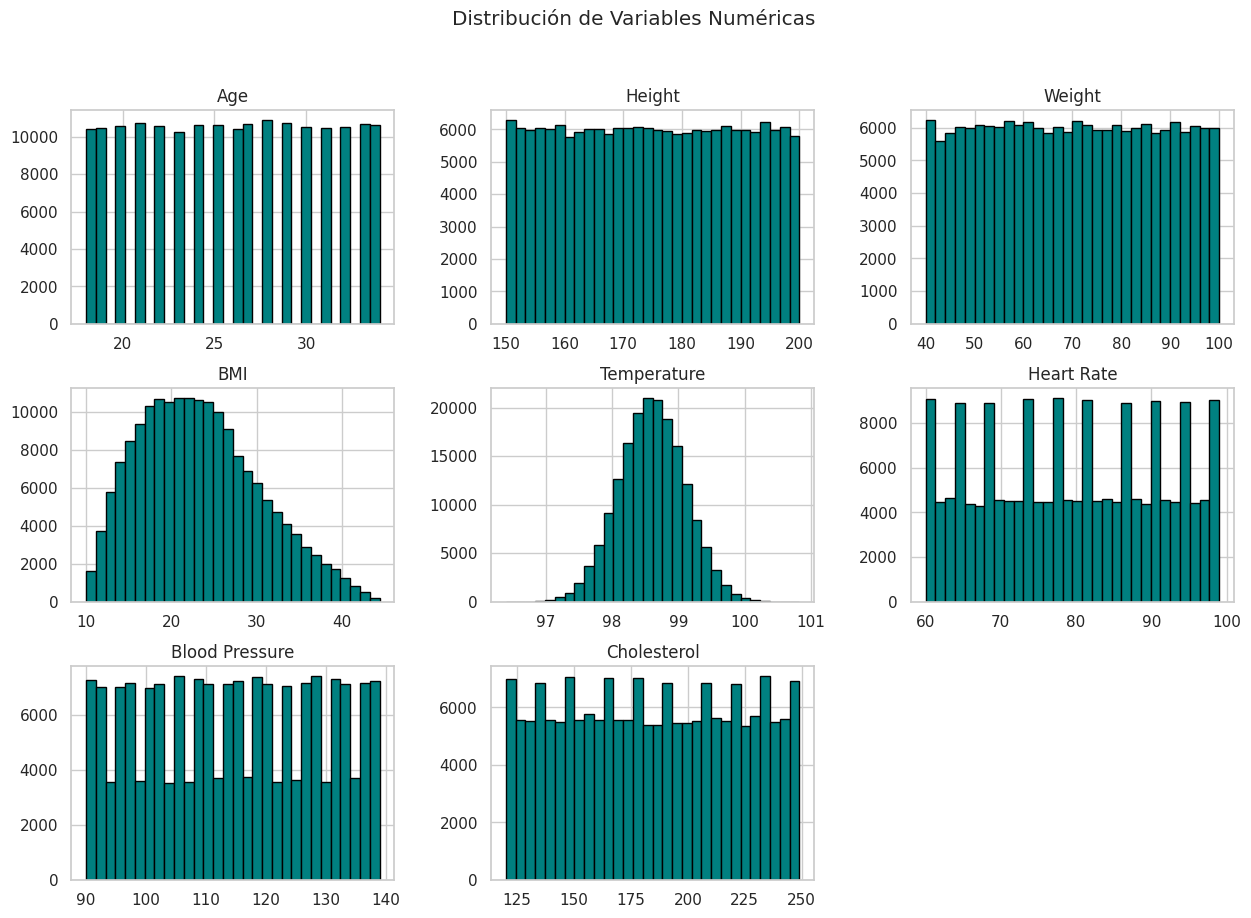

In [22]:
cols = ['Age','Height',	'Weight',	'BMI',	'Temperature',	'Heart Rate',	'Blood Pressure',	'Cholesterol']
df_functional[cols].hist(bins=30, figsize=(15, 10), color='teal', edgecolor='black')
plt.suptitle('Distribución de Variables Numéricas')
plt.show()

Como podemos ver el comportamiento se mantuvo luego de rellenar los valores faltantes.

## Corrigiendo formato de las variable

In [23]:
df_struct_cast = df_functional.copy()

cols_a_enteros = ['Student ID', 'Age', 'Heart Rate', 'Blood Pressure', 'Cholesterol']

for col in cols_a_enteros:
    df_struct_cast[col] = df_struct_cast[col].astype(int)


cols_a_boolean = ['Diabetes', 'Smoking']

for col in cols_a_boolean:
   df_struct_cast[col] = df_struct_cast[col].map({'Yes': 1, 'No': 0}).astype(int)


df_struct_cast.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1,18,Female,161.777924,72.354947,O,27.645835,98.576584,95,109,203,0,1
1,2,23,Male,152.069157,47.630941,B,20.597139,98.714977,93,104,163,0,0
2,3,32,Female,182.537664,55.741083,A,16.729017,98.260293,76,130,216,1,0
4,5,23,Female,197.692721,46.234173,O,11.829918,98.480008,95,106,231,0,0
5,6,32,Male,151.491294,68.647805,B,29.912403,99.668373,70,128,183,0,1


Una vez completada la documentacion de valores faltantes, nos queda corregir el formato de las variables. Convertimos a números enteros campos como la edad, la frecuencia cardíaca o el ID porque, en la realidad, son conteos exactos que no deberían ser de tipo `float`. Del mismo modo, transformamos las respuestas de texto 'Sí/No' a valores lógicos. Con esto garantizamos que la estructura técnica de nuestra tabla coincida con la naturaleza real de la información que contiene.

# Analizando comportamiento de los datos

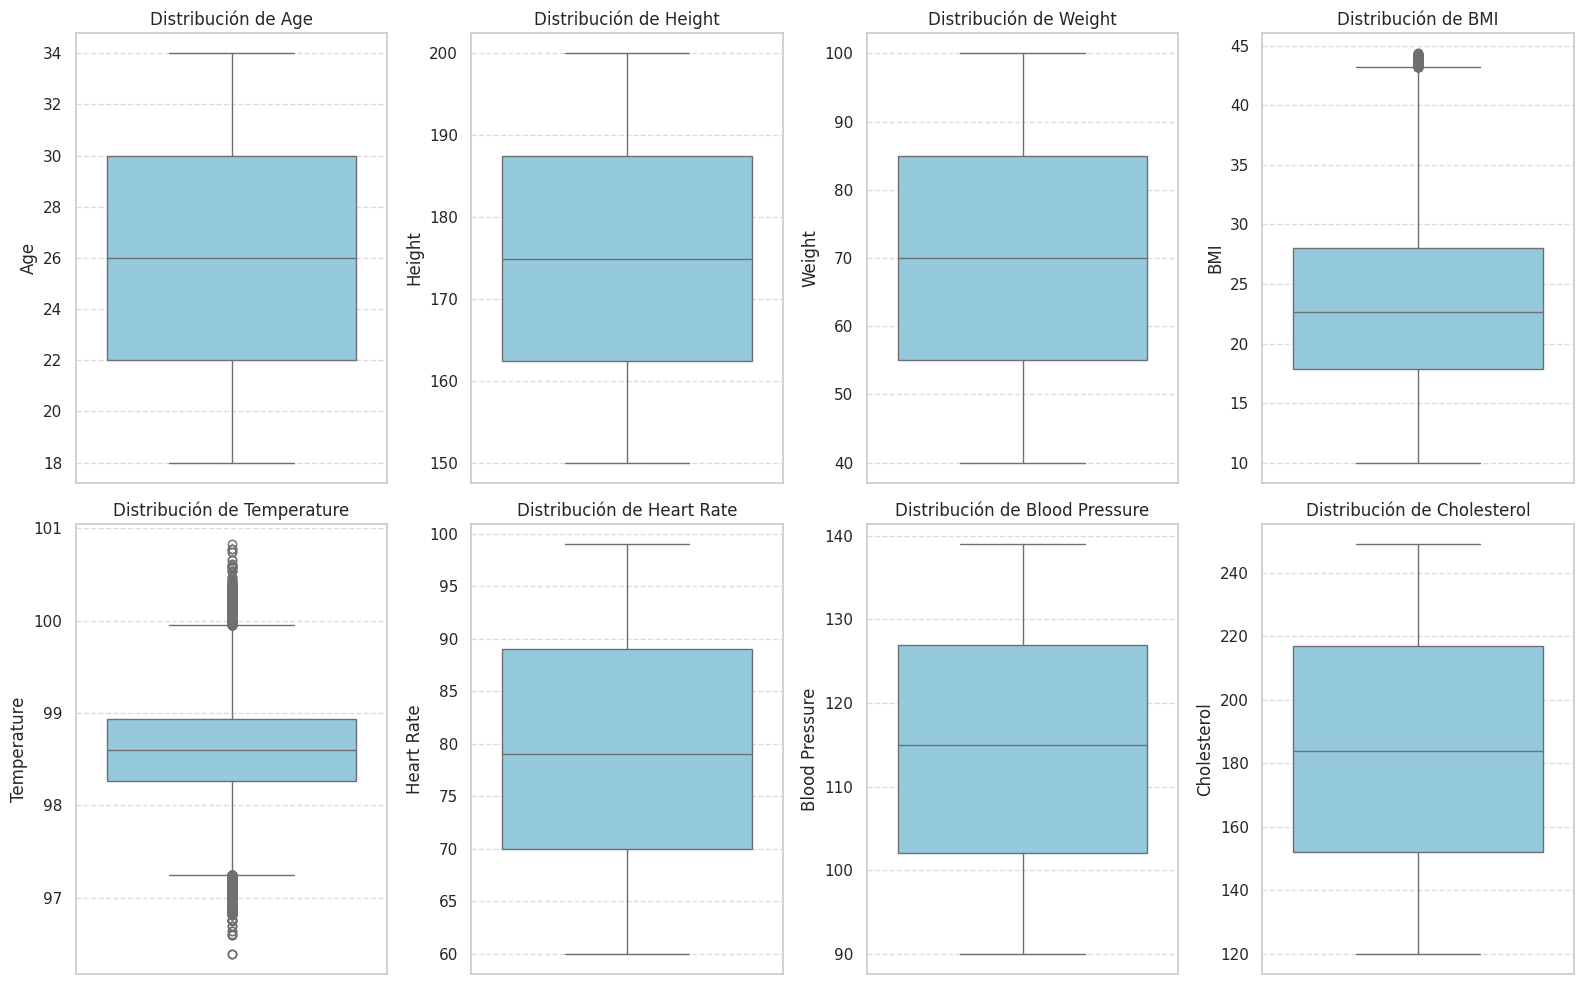

In [24]:
# Seleccionamos las variables numéricas de interés
cols_outliers = ['Age', 'Height', 'Weight', 'BMI', 'Temperature',
                 'Heart Rate', 'Blood Pressure', 'Cholesterol']

# Generamos un panel de gráficos
plt.figure(figsize=(16, 10))
for i, col in enumerate(cols_outliers):
    plt.subplot(2, 4, i+1) # Ajusta filas/columnas según cantidad de variables
    sns.boxplot(y=df_struct_cast[col], color='skyblue') # Boxplot vertical
    plt.title(f'Distribución de {col}', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Para revisar que los datos fueran correctos, hicimos un análisis para encontrar valores muy diferentes al resto usando gráficos llamados diagramas de caja. Al mirar estos gráficos, vimos que la mayoría de las medidas de salud, como la presión arterial o el ritmo del corazón, estaban dentro de lo normal. Pero encontramos algunos valores muy altos o bajos en la temperatura y el índice de masa corporal (BMI).
Después de pensar en el contexto médico, decidimos no borrar esos datos. Esto es porque en un conjunto de datos de salud, un valor alto de temperatura o BMI no siempre es un error, sino que puede ser un caso real, como alguien con fiebre o con obesidad. Si eliminamos esos datos, perderíamos información importante sobre las enfermedades que queremos estudiar en los estudiantes.

# Selección de variables informativas

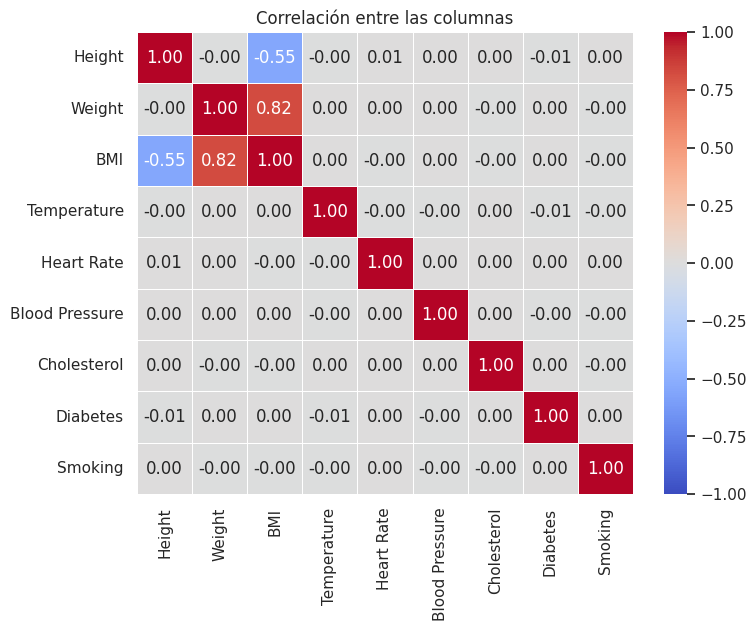

In [25]:
cols_redundancia = ['Height',	'Weight',	'BMI',	'Temperature',	'Heart Rate',	'Blood Pressure',	'Cholesterol',	'Diabetes',	'Smoking']

# Calculamos la matriz de correlación (Qué tanto depende una de otra)
corr_matrix = df_struct_cast[cols_redundancia].corr()

# 3. Generamos el Mapa de Calor (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix,
            annot=True,       # Muestra los números en las casillas
            cmap='coolwarm',  # Colores: Rojo (Positivo), Azul (Negativo)
            fmt=".2f",        # 2 decimales
            linewidths=0.5,
            vmin=-1, vmax=1)  # Límites de la escala de color

plt.title('Correlación entre las columnas')
plt.show()

Para mejorar nuestro conjunto de datos, decidimos quitar la variable `BMI` o "indice de masa corporal". Esto es porque el BMI depende completamente del peso y la altura, es decir, se puede calcular directamente con esos dos datos.


La fórmula original es:

$$BMI = \frac{Peso}{Altura^2}$$

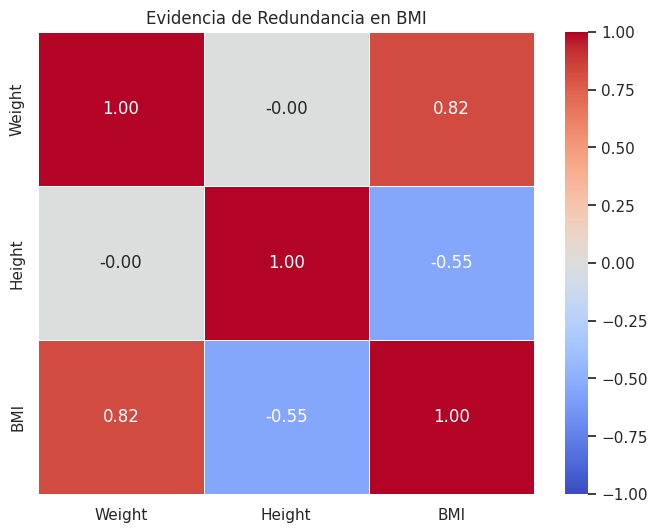


 Correlación entre Peso y BMI: 0.8209736962454778


In [26]:
cols_redundancia = ['Weight', 'Height', 'BMI']

# Calculamos la matriz de correlación (Qué tanto depende una de otra)
corr_matrix = df_struct_cast[cols_redundancia].corr()

# 3. Generamos el Mapa de Calor (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix,
            annot=True,       # Muestra los números en las casillas
            cmap='coolwarm',  # Colores: Rojo (Positivo), Azul (Negativo)
            fmt=".2f",        # 2 decimales
            linewidths=0.5,
            vmin=-1, vmax=1)  # Límites de la escala de color

plt.title('Evidencia de Redundancia en BMI')
plt.show()

# Imprimimos el valor exacto para el reporte
print("\n Correlación entre Peso y BMI:", corr_matrix.loc['Weight', 'BMI'])

Como mostramos en el gráfico anterior, tener las tres variables juntas causa un problema llamado multicolinealidad, que significa que hay información repetida. Esto puede complicar mucho los modelos que usamos para analizar los datos, porque hace que sea difícil saber cuál variable es realmente importante y puede hacer que el modelo sea menos preciso. Al eliminar el `BMI`, no perdemos información, ya que esa información está contenida en el peso y la altura. Pero ganamos un modelo más simple, claro y eficiente.

Otra variable que decidimos eliminar en esta última etapa es el número de identificación del estudiante `Student ID`. Al principio fue muy útil para limpiar los datos, porque nos ayudó a detectar y quitar registros sin información clara. Pero ahora, para el análisis, ya no sirve de mucho.
El número de identificación es solo una etiqueta administrativa, no aporta nada sobre la salud o características biológicas de los estudiantes. Como nuestro objetivo es que el modelo aprenda de datos como el peso o la edad, y no de un simple número, quitar esta columna evita que el algoritmo busque relaciones falsas basadas en un número que solo sirve para identificar.

In [27]:
df_reduc = df_struct_cast.copy()
cols_delete = ['Student ID', 'BMI']
df_pre = df_reduc.drop(columns=cols_delete)

# Dataset preprocesado

In [28]:
print(f"Dimensiones finales: {df_pre.shape}")
df_pre.head(n=21)

Dimensiones finales: (180000, 11)


,Age,Gender,Height,Weight,Blood Type,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,18,Female,161.777924,72.354947,O,98.576584,95,109,203,0,1
1,23,Male,152.069157,47.630941,B,98.714977,93,104,163,0,0
2,32,Female,182.537664,55.741083,A,98.260293,76,130,216,1,0
4,23,Female,197.692721,46.234173,O,98.480008,95,106,231,0,0
5,32,Male,151.491294,68.647805,B,99.668373,70,128,183,0,1
6,21,Female,172.949704,48.102744,AB,97.715469,66,134,247,0,0
7,28,Male,186.489402,52.389752,AB,98.227788,85,123,128,0,0
8,21,Male,155.039678,42.958703,B,98.808053,94,111,243,0,0
9,32,Male,170.836315,50.783250,B,98.570168,61,94,166,0,0
10,28,Female,152.973928,73.572814,B,98.371843,60,133,241,0,1


En este preprocesamiento se tomaron algunas decisiones importantes sobre cómo manejar las variables. Las que solo tienen dos opciones, como si una persona tiene diabetes o si fuma, se convirtieron en números 0 y 1. Esto facilita calcular cosas como el porcentaje de personas con diabetes, sin perder el sentido de “sí” o “no”.
También se decidió no cambiar las unidades ni escalar los datos numéricos como la edad, la altura o el peso. Esto es importante porque, en análisis médicos, es mejor mantener las medidas reales para que los resultados sean claros y fáciles de entender. Cambiar esos valores a números sin unidad podría dificultar reconocer patrones médicos. Lo mismo aplica para variables como el género o el tipo de sangre, que se dejaron en texto para conservar su significado y facilitar su interpretación clínica.


La necesidad de transformar o estandarizar los datos depende mucho del propósito con que se vayan a usar. Si los datos se van a utilizar para un modelo, es necesario hacer esas transformaciones para que el modelo funcione correctamente. Sin embargo, en este caso asumimos, que el objetivo es obtener información que un médico pueda entender fácilmente, se decidió mantener los datos en su forma original. Si se llegara a usar un modelo, solo faltaría aplicar las transformaciones a las columnas correspondientes. En tal caso, es importante recordar que, si se llega a trabajar con modelos de clasificación, es necesario revisar las proporciones de la variable objetivo para asegurarse de que el modelo sea adecuado.

# Extracción de conocimiento según el uso

Para aclarar mejor las decisiones que se tomaron sobre el conjunto de datos, vamos a explicar qué tipo de información se puede obtener según el enfoque que se elija para trabajar con esos datos.


## Uso para conocimiento clínico y consultas

En este caso los datos deben esta limpios pero no deben ser abstractos, este uso está pensado para que el personal médico o administrativo pueda obtener información directa y fácil de entender, usando filtros y agrupaciones sin necesidad de conocimientos técnicos. Por ejemplo, se puede pedir una lista de todas las pacientes mujeres con tipo de sangre O que tengan diabetes. Mantener la información en texto ayuda a validar reglas médicas o hipótesis de forma sencilla. Además, un médico puede detectar rápidamente errores en los datos si lee las etiquetas reales, como un valor extraño en una categoría, algo que se complica si solo ve números codificados. También se pueden generar reportes con estadísticas descriptivas útiles para la toma de decisiones en el hospital, como saber que el 60% de los ingresos corresponde a personas con tipo de sangre A.

## Uso para modelo de aprendizaje automatico

Aqui es donde los datos necesariamente tienen que ser tranfomormados a numeros, el modelo no interpreta directamente que un paciente es mujer, sino que asigna valores numéricos y calcula probabilidades, por ejemplo, entrenar un modelo para predecir la diabetes, con esto no solo se obtiene un resultado de "sí" o "no", sino una probabilidad de riesgo que permite identificar casos con alta probabilidad, como un estudiante joven con índice de masa corporal alto y colesterol elevado, facilitando una intervención temprana. También se puede medir el impacto de hábitos como fumar sobre signos vitales, cuantificando cuánto aumenta la presión arterial al fumar, independientemente de otros factores como la edad o el peso. Además, al agrupar a los estudiantes sin usar etiquetas previas, se pueden descubrir perfiles ocultos, como un grupo de "falsos saludables" que tienen peso normal pero presentan colesterol y presión arterial altos, un patrón difícil de detectar revisando datos individuales. Este método es más abstracto y necesita que un analista traduzca los resultados numéricos para que los médicos puedan entenderlos.

##